# Load data

In [69]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#import matplotlib.pyplot as plt
#plt.imshow(X_train[0])
num_classes = 10

from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
#y_train[:10]

In [70]:
from PIL import Image
import numpy as np
def resize_image(data):
    img = Image.fromarray(data.reshape(28,28))
    img = img.resize(size=(32,32))
    return np.array(img)
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#scaler = scaler.fit(X_train.reshape(60000,28*28))
#X_train = scaler.transform(X_train.reshape(60000,28*28))
#X_test = scaler.transform(X_test.reshape(10000,28*28))
X_train = np.array([resize_image(x) for x in X_train]).astype('float32')
X_test = np.array([resize_image(x) for x in X_test]).astype('float32')
X_train /= 255.0
X_test /= 255.0


/home/y247xie/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [71]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=13)

# Build NN

In [58]:
X_train_full = X_train
X_test_full = X_test
y_train_full = y_train
y_test_full = y_test

X_train = X_train[:1000]
y_train = y_train[:1000]
X_test = X_test[:100]
y_test = y_test[:100]

In [93]:
import time
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
from keras import optimizers
from keras import backend as K
#create model
start_time = time.time()
model = Sequential()
#add model layers
img_rows, img_cols = 32,32
print(K.image_data_format())
if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
#keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=13)
#keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=13)
# 32，32
channel_multiply = 4
model.add(Conv2D(1 * channel_multiply, (3,3), activation='relu',
                 input_shape=input_shape, kernel_initializer='glorot_uniform'))
# 30，30
model.add(Conv2D(2 * channel_multiply, (3,3), activation='relu', kernel_initializer='glorot_uniform'))
# 28, 28
model.add(Conv2D(4 * channel_multiply, (3,3), activation='relu', padding='same', kernel_initializer='glorot_uniform'))
# 28, 28
model.add(Conv2D(4 * channel_multiply, (3,3), activation='relu', kernel_initializer='glorot_uniform'))
# 26, 26
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# 13，13
model.add(Conv2D(8 * channel_multiply, (3,3), activation='relu', padding='same',kernel_initializer='glorot_uniform'))
# 13, 13
model.add(Conv2D(8 * channel_multiply, (3,3), activation='relu', kernel_initializer='glorot_uniform'))
# 11, 11
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# 6, 6
model.add(Conv2D(8 * channel_multiply, (3,3), activation='relu', padding='same',kernel_initializer='glorot_uniform'))
# 6, 6 
model.add(Conv2D(8 * channel_multiply, (3,3), activation='relu',kernel_initializer='glorot_uniform'))
# 4, 4 
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
# 2，2
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(128))
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
#compile model using accuracy to measure model performance
#sgd = optimizers.SGD(lr=1e-8, decay=1e-6, momentum=0.9, nesterov=True)
adam = optimizers.Adamax(lr=1e-3, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-5)
ada = optimizers.Adadelta()
model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph', histogram_freq=0, 
                                         write_graph=True, write_images=True)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=32,callbacks=[tbCallBack])
print(history1.history.keys)
#model.predict(X_test[:4])

end_time = time.time()
print((end_time-start_time)/60)

channels_last
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 49s 815us/step - loss: 0.3006 - acc: 0.9025 - val_loss: 0.0879 - val_acc: 0.9739
Epoch 2/3
60000/60000 [==============================] - 45s 752us/step - loss: 0.0922 - acc: 0.9716 - val_loss: 0.0611 - val_acc: 0.9804
Epoch 3/3
60000/60000 [==============================] - 42s 705us/step - loss: 0.0618 - acc: 0.9806 - val_loss: 0.0470 - val_acc: 0.9852
<built-in method keys of dict object at 0x7f1ed70e6688>
2.448915096124013


In [84]:
model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 44s 731us/step - loss: 0.0454 - acc: 0.9863 - val_loss: 0.0396 - val_acc: 0.9873
Epoch 2/3
60000/60000 [==============================] - 41s 690us/step - loss: 0.0363 - acc: 0.9885 - val_loss: 0.0336 - val_acc: 0.9896
Epoch 3/3
60000/60000 [==============================] - 41s 690us/step - loss: 0.0303 - acc: 0.9906 - val_loss: 0.0331 - val_acc: 0.9906
<built-in method keys of dict object at 0x7f1ececf6f48>


In [85]:
model.compile(optimizer=adam, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=128)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 45s 742us/step - loss: 0.0248 - acc: 0.9921 - val_loss: 0.0284 - val_acc: 0.9917
Epoch 2/3
60000/60000 [==============================] - 42s 695us/step - loss: 0.0202 - acc: 0.9938 - val_loss: 0.0300 - val_acc: 0.9906
Epoch 3/3
60000/60000 [==============================] - 42s 696us/step - loss: 0.0178 - acc: 0.9942 - val_loss: 0.0297 - val_acc: 0.9907
<built-in method keys of dict object at 0x7f1ececf6f48>


In [89]:
sgd = optimizers.SGD(lr=1e-2, decay=1e-3, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
history1 = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3, batch_size=64)

NameError: name 'callback_tensorboard' is not defined

dict_keys(['loss', 'val_loss', 'val_acc', 'acc'])


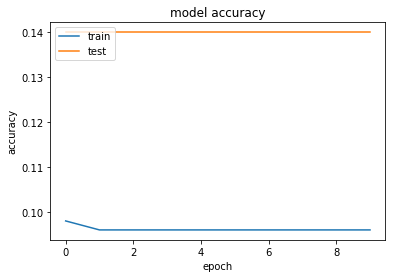

In [88]:
print(history.history.keys())
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
